In [1]:
# Estimator object we can use to quickly create models without needing to define the graph

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Columns can't have spaces for TF Estimator Object

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [6]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# Also the target must be an integer

In [7]:
df['target'] = df['target'].apply(int)

In [8]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Separate X and y

In [9]:
y = df['target']

In [10]:
X = df.drop('target', axis=1)

# train test split

In [11]:
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Use TENSORFLOW

In [256]:
import tensorflow as tf

In [257]:
# FEATURE COLUMNS

In [258]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [259]:
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [260]:
feat_cols #specialized numeric column object

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [262]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=3,num_epochs=12, shuffle=True)
# Epochs : if ive gone to everysingle training point 5 times, then I've done with it

In [263]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,5, 10], n_classes=3, feature_columns=feat_cols)
# First layer 10 neurons
# second layer 20 neurons
# Third 10 neurons

#Nclasses: 3 types of flowr, 2 categories, etc

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\bruno\\AppData\\Local\\Temp\\tmpfj5a7qel', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001481E9CBBA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [264]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(
  allow_soft_placement=True, log_device_placement=True))

In [ ]:
with tf.device('/gpu:0'):
    classifier.train(input_fn=input_func, steps=150000000000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.


In [250]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test),shuffle=False)

In [251]:
with tf.device('/gpu:0'):
    predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\bruno\AppData\Local\Temp\tmp5uvzwq6c\model.ckpt-150
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [252]:
predictions

[{'logits': array([-1.1319065,  2.459757 ,  2.3296795], dtype=float32),
  'probabilities': array([0.01445883, 0.5247747 , 0.46076646], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([ 3.4357295, -0.3812008, -1.448207 ], dtype=float32),
  'probabilities': array([0.9712865 , 0.02136366, 0.00734989], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([ 3.0146594, -0.3231379, -1.3013148], dtype=float32),
  'probabilities': array([0.95340824, 0.03386039, 0.01273137], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([ 2.8642838 , -0.28724423, -1.244587  ], dtype=float32),
  'probabilities': array([0.94409716, 0.04039479, 0.01550804], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-4.0179195,  2.5543253,  4.533585 ], dtype

In [253]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])


	             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.50      0.67        12
          2       0.71      1.00      0.83        15

avg / total       0.89      0.84      0.83        38



Text(0.5,15,'Predicted label')

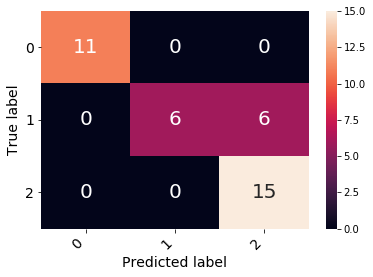

In [254]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(f"\n\t{classification_report(y_test, final_preds)}")
cfm = confusion_matrix(y_test, final_preds)
confusion_matrix_df = pd.DataFrame(cfm, ('0', '1', '2'), ('0', '1', '2'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)